In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("dataset_graphcomponent.csv")
synomy_data = data[data['relation']=='S']
print synomy_data

                w0            w1 relation  component
0      unnecessary      unneeded        S          0
3      undesirable      unwanted        S          0
11          single    individual        S          0
12          single     unmarried        S          0
18            best          good        S          0
22         certain          sure        S          0
23         certain        sealed        S          0
30        economic    economical        S          0
32            like         alike        S          0
33            like       similar        S          0
34            like          same        S          0
37       classical       classic        S          0
39            long  recollective        S          0
40            long     tenacious        S          0
41            long     retentive        S          0
45          social      societal        S          0
47     represented    delineated        S          0
48     represented     delineate        S     

In [4]:
print len(set(synomy_data["w1"])) - len(set(synomy_data["w0"]))

2783


In [5]:
W1 = list(set(synomy_data["w1"]))
W1 = np.array(W1)
print "Length W1 = ",len(W1)
W0 = list(set(synomy_data["w0"]))
W0 = np.array(W0)
print "Length W0 = ",len(W0)

Length W1 =  25259
Length W0 =  22476


In [6]:
print W1

['fawn' 'deferment' 'chthonic' ... 'northerly' 'degustation' 'jawbone']


In [7]:
print W0

['fawn' 'deferment' 'woods' ... 'northerly' 'untalented' 'jawbone']


In [8]:
print len(set([w for w in W0 if len(w)==4]))

1440


In [9]:
four_words = [w for w in W0 if len(w)==4]

In [10]:

import RNA
edges = []
for w0 in four_words : 
    for w1 in four_words :
        if RNA.hamming_distance(w0, w1) == 1 : 
            edges.append((w0,w1))
        

In [14]:
print len(edges)

8414


In [13]:
import networkx as nx 
import matplotlib.pyplot as plt 
G_four = nx.Graph()
G_four.add_edges_from(edges)

print len(list(nx.connected_component_subgraphs(G_four)))


30


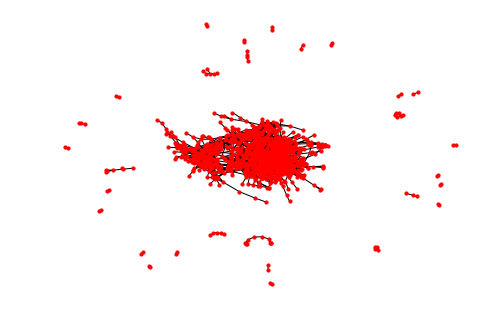

In [69]:
nx.draw(G_four, node_size=10)
plt.show()

In [72]:

for g in list(nx.connected_component_subgraphs(G_four)) : 
    if len(g.nodes)==1275 : 
        Gian = g 

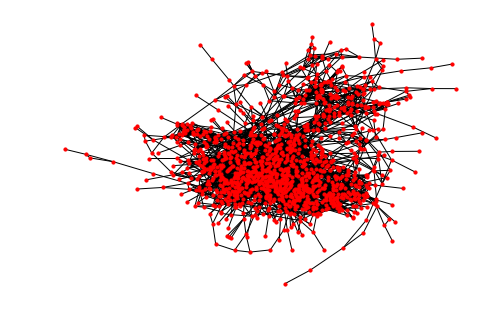

In [73]:
nx.draw(Gian, node_size=10)
plt.show()

In [7]:
Edges = []
for word in W0 [:1000] : 
    for w in synomy_data[synomy_data["w0"]==word]['w1']: 
        Edges.append((word,w))
    

In [8]:
import networkx as nx 
import matplotlib.pyplot as plt

691


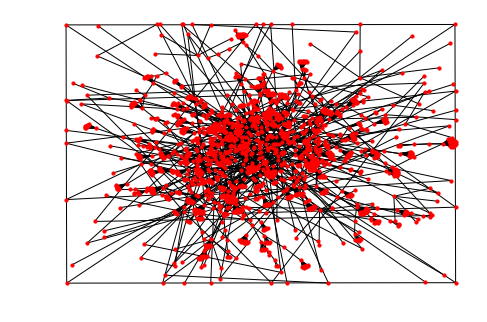

In [70]:
G = nx.Graph()
G.add_edges_from(Edges)
print len(list(nx.connected_component_subgraphs(G)))
tria

for G in list(nx.connected_component_subgraphs(G)):
    A = nx.to_numpy_matrix(G)
    if np.trace(np.linalg.matrix_power(A, 3))/6. >=1 : 
        nx.draw(G, node_size=10)
plt.show()

In [22]:
df = pd.read_csv("freqVSSyn.csv")

print df

       Unnamed: 0           word    frequence  number_of_edges
0               0           fawn     761340.0              6.0
1               1      deferment     342709.0              1.0
2               2          woods   14647735.0              1.0
3               3        clotted      89781.0              4.0
4               4        hanging   10190519.0              6.0
5               5          woody    4355633.0              1.0
6               6      localized    2414106.0              4.0
7               7        spidery      30676.0              1.0
8               8         sevens     423530.0              5.0
9               9          scold     170208.0              6.0
10             10     alphabetic     949640.0              1.0
11             11   transvestism      52181.0              1.0
12             12      screaming    3812764.0             11.0
13             13         wooded    1144287.0              1.0
14             14       grueling     303292.0          

In [5]:
dict_df = {}
for key in set(df['number_of_edges']): 
    dict_df[key] = list(df[df['number_of_edges']==key]['frequence'])

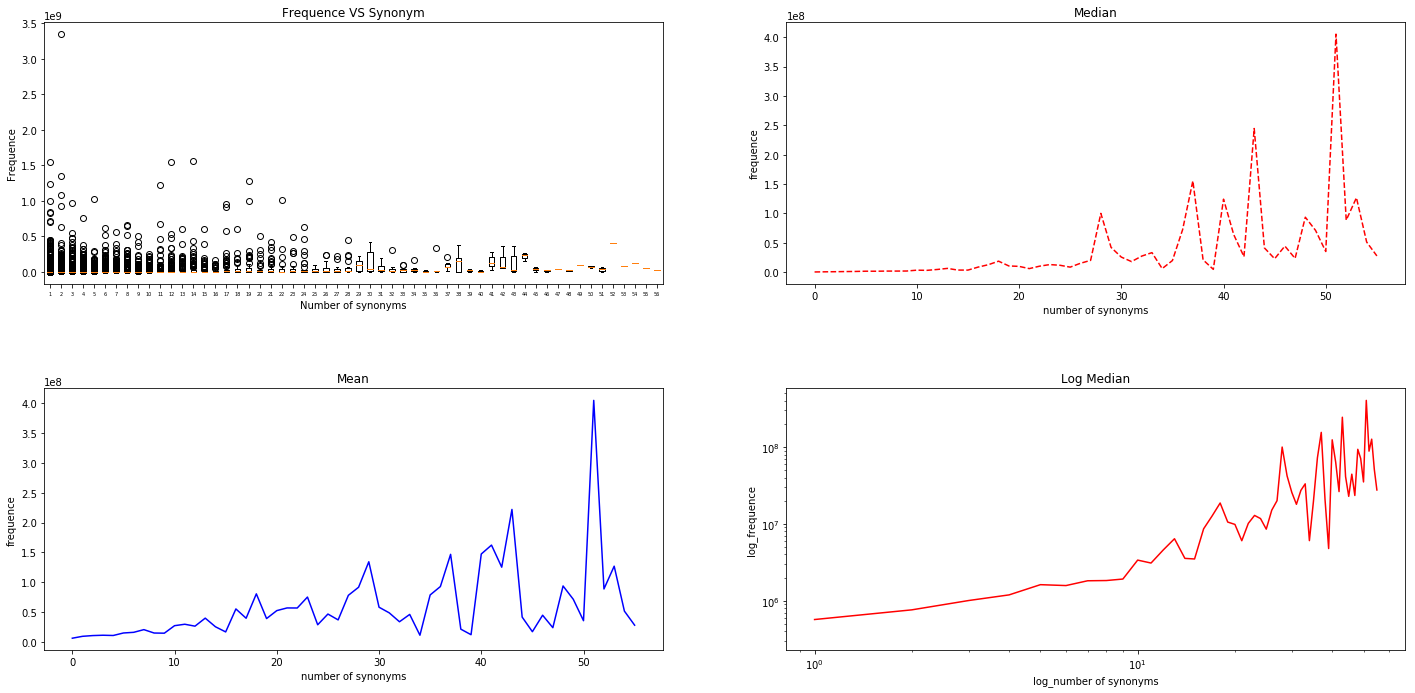

In [23]:
from pylab import rcParams
left = 0.225  # the left side of the subplots of the figure
right = 1.8   # the right side of the subplots of the figure
bottom = 0.02  # the bottom of the subplots of the figure
top = 2.2   # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
              # expressed as a fraction of the average axis width
hspace = 0.4
fit = True #Display the fitting line on the plot or not
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

plt.subplot(2,2,1)
plt.title('Frequence VS Synonym')
plt.xlabel("Number of synonyms")
plt.ylabel("Frequence")
plt.tick_params(axis='x', labelsize=5)
plt.boxplot(dict_df.values())

plt.subplot(2,2,4)
plt.title('Log Median')
plt.xlabel("log_number of synonyms")
plt.ylabel("log_frequence")
plt.loglog(medians, color="red")


plt.subplot(2,2,2)
plt.title('Median')
plt.xlabel("number of synonyms")
plt.ylabel("frequence")
plt.plot(medians, 'r--')


plt.subplot(2,2,3)
plt.title('Mean')
plt.xlabel("number of synonyms")
plt.ylabel("frequence")
plt.plot(means, color="blue")
plt.savefig("freqVSsyn.pdf")

plt.show()

In [16]:
means =[]
medians =[]

for key in dict_df.keys() :
    means.append(np.mean(dict_df[key]))
    medians.append(np.median(dict_df[key]))

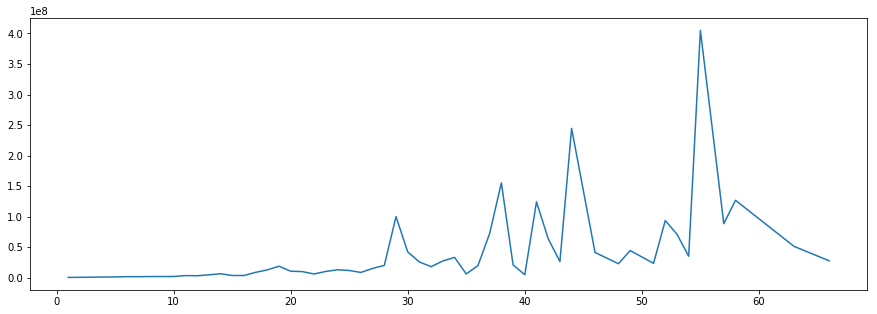

In [51]:
plt.plot(dict_df.keys(),medians)
plt.show()

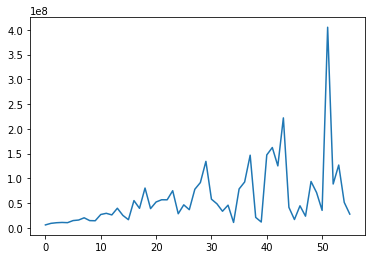

In [24]:
plt.plot(means)
plt.show()

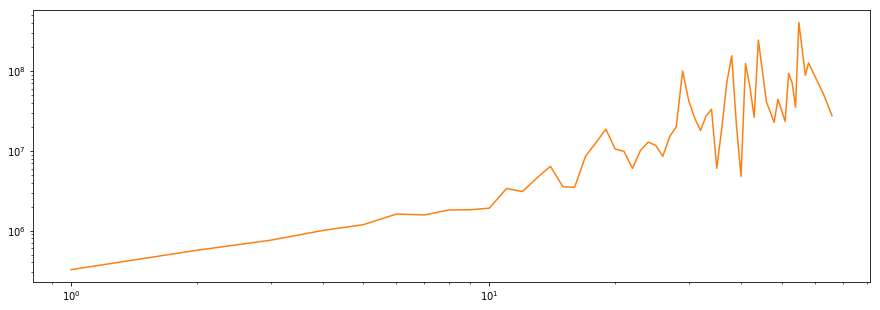

In [53]:
plt.loglog(dict_df.keys(),medians)
plt.show()

In [24]:
ricci_data = pd.read_csv("ricciVSfreq.csv")

print ricci_data

       Unnamed: 0             word  adj_ricci_avg    frequency
0               0             awed       0.500000     226844.0
1               1            china       0.250000  124472054.0
2               2  unprepossessing       1.000000      16233.0
3               3     introversion       0.666667      64498.0
4               4         geminate      -0.397205      18583.0
5               5            scoff       0.211030     177728.0
6               6      gatecrasher       1.000000     124681.0
7               7        carefully       0.333333   16675728.0
8               8             riot      -0.252991    2665813.0
9               9             snow      -0.021429   35358852.0
10             10          respect      -0.387610   48329678.0
11             11        buttercup       1.000000     455990.0
12             12       annihilate       0.323718     205665.0
13             13      columbarium       0.500000      37126.0
14             14           scaled      -0.181818    27

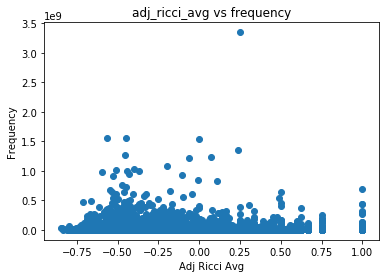

In [35]:
plt.scatter(ricci_data["adj_ricci_avg"],ricci_data["frequency"])
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Frequency")
plt.title("adj_ricci_avg vs frequency")
plt.savefig("scatter.pdf")
plt.show()

In [18]:
len(set(ricci_data["adj_ricci_avg"])), len(set(ricci_data["frequency"]))

(13297, 20511)

In [20]:
dict_df = {}
for key in set(ricci_data['adj_ricci_avg']): 
    dict_df[key] = list(ricci_data[ricci_data['adj_ricci_avg']==key]['frequency'])

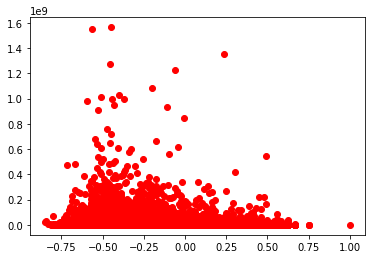

In [38]:
plt.plot(adj_ricci_avg, ricci_median, "ro")
plt.show()

In [32]:
ricci_median = []
adj_ricci_avg = []
for key in dict_df.keys() :
    ricci_median.append(np.median(dict_df[key]))
    adj_ricci_avg.append(key)

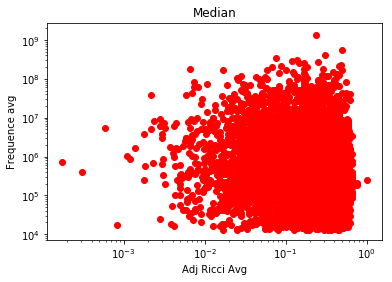

In [37]:
plt.loglog(adj_ricci_avg,ricci_median, 'ro')
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Frequence avg")
plt.title("Median")
plt.savefig("median_ricci.pdf")
plt.show()

In [29]:
ricci_vs_degree =[]
for line in ricci_data.get_values():
    ricci_vs_degree.append([line[2],float(df[df['word']==line[1]]['number_of_edges'] )])

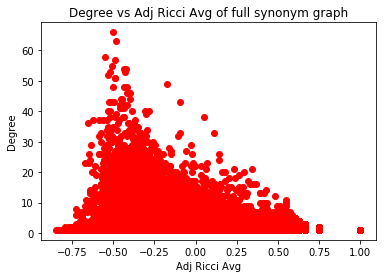

In [34]:
ricci_vs_degree = np.array(ricci_vs_degree)

plt.plot(ricci_vs_degree[:,0], ricci_vs_degree[:,1], "ro")
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Degree")
plt.title("Degree vs Adj Ricci Avg of full synonym graph")
plt.savefig("dgVSadvricci.pdf")
plt.show()

In [35]:
ricci4letter_vs_degree =[]
for line in ricci_data.get_values():
    if len(line[1]) == 4 : 
        ricci4letter_vs_degree.append([line[2],float(df[df['word']==line[1]]['number_of_edges'] )])
print len(ricci4letter_vs_degree)

1424


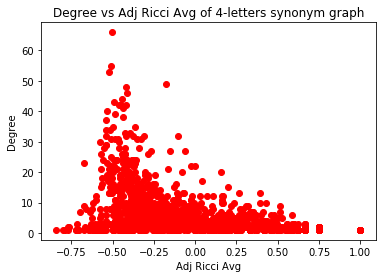

In [36]:
ricci4letter_vs_degree = np.array(ricci4letter_vs_degree)

plt.plot(ricci4letter_vs_degree[:,0], ricci4letter_vs_degree[:,1], "ro")
plt.xlabel("Adj Ricci Avg")
plt.ylabel("Degree")
plt.title("Degree vs Adj Ricci Avg of 4-letters synonym graph")
plt.savefig("dgVSadvricci_4letters.pdf")
plt.show()

In [38]:
ricci_data_plus = pd.read_csv("ricci.csv")
print ricci_data_plus

       Unnamed: 0           w0            w1     ricci
0               0  unnecessary      unneeded  0.250000
1               1  undesirable      unwanted  0.500000
2               2       single    individual -0.549020
3               3       single     unmarried -0.444444
4               4         best          good -0.092832
5               5      certain          sure -0.129371
6               6      certain        sealed -0.673077
7               7     economic    economical -0.333333
8               8         like         alike -0.297619
9               9         like       similar -0.400000
10             10         like          same -0.319444
11             11    classical       classic  0.214286
12             12         long  recollective -0.038889
13             13         long     tenacious -0.416667
14             14         long     retentive -0.038889
15             15       social      societal  0.166667
16             16  represented    delineated -0.563636
17        

In [58]:
ricci_4letter_edges = []
for line in ricci_data_plus.get_values() : 
    if len(line[1]) == 4 and  len(line[2]) == 4 :
        ricci_4letter_edges.append(tuple(line))


In [62]:
class FilterFunction(object) : 

    def __init__(self, word):
        self.word = word
        
    def wordFilter(self, tupl) : 
        if (tupl[1] == self.word or tupl[2] == self.word ) and tupl[3]<0 : 
            return tupl

In [68]:

dict_edge_with_negricci = {}
number_of_edges = {}
for line in ricci_data.get_values() : 
    if len(line[1]) == 4 : 
        list_ = filter(FilterFunction(line[1]).wordFilter, ricci_4letter_edges)
        number_of_edges[line[1]] = list_
        dict_edge_with_negricci[line[1]] = len(list_)
 

In [69]:
print len(dict_edge_with_negricci)

1424


In [71]:
neg_ricci4letter_vs_degree =[]
for key in dict_edge_with_negricci.keys():
    neg_ricci4letter_vs_degree.append([dict_edge_with_negricci[key],float(df[df['word']==key]['number_of_edges'] )])
print len(neg_ricci4letter_vs_degree)

1424


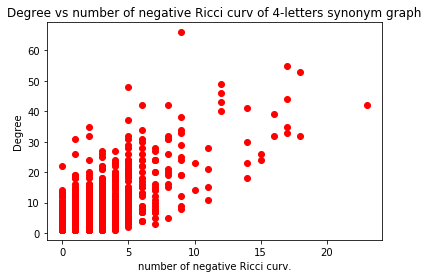

In [72]:
neg_ricci4letter_vs_degree = np.array(neg_ricci4letter_vs_degree)
plt.plot(neg_ricci4letter_vs_degree[:,0], neg_ricci4letter_vs_degree[:,1], "ro")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("dgVSnegricci_4letters.pdf")
plt.show()

In [84]:
medians = []
means = []

dict_ = {}

for id_ in set(neg_ricci4letter_vs_degree[:,0]) : 
    list_ = [] 
    for rc in neg_ricci4letter_vs_degree :
        if rc[0] == id_ : 
            list_.append(rc[1])
    medians.append([id_, np.median(list_)])
    means.append([id_, np.mean(list_)])
    dict_[id_] = list_
            
    
    

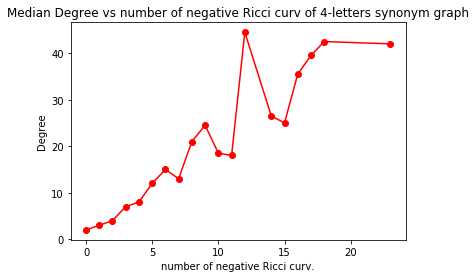

In [85]:
medians = np.array(medians)
plt.plot(medians[:,0], medians[:,1], "r-o")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Median Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("md_dgVSnegricci_4letters.pdf")
plt.show()

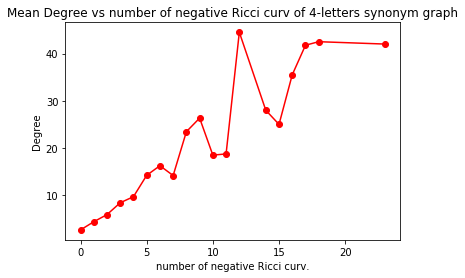

In [86]:
means = np.array(means)
plt.plot(means[:,0], means[:,1], "r-o")
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Mean Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("mean_dgVSnegricci_4letters.pdf")
plt.show()

In [89]:
neg_ricci4letter_vs_degree = np.array(neg_ricci4letter_vs_degree)
plt.boxplot(dict_[:10])
"""
plt.xlabel("number of negative Ricci curv.")
plt.ylabel("Degree")
plt.title("Degree vs number of negative Ricci curv of 4-letters synonym graph")
plt.savefig("dgVSnegricci_4letters.pdf")
"""

plt.show()

TypeError: unhashable type

In [90]:
arr_100 = np.array([  321,  9685, 10000, 10000,  8933,   114,   170, 10000, 10000,
        5504,  6334,  2005,   488,  4857, 10000,   393,  2444,  9849,
       10000,  5552,   781, 10000,  8287,   515, 10000,  6115,   150,
       10000,  2208,   597, 10000,  5161,  5699,  1086,   442,   357,
        7257,  4810, 10000,   160, 10000, 10000,   248, 10000,   234,
       10000, 10000,  7893,   142, 10000,  4037,   116, 10000, 10000,
       10000,  9742, 10000, 10000,   300,  2506,   216,  7200,    99,
        7526,  4175,    96, 10000,   184,   619,  8892,   152, 10000,
       10000,  9827,  6566,  1239,  5925, 10000,   470,  2920, 10000,
         117,  6137,   731, 10000,  7153,   330,  3595,  5538, 10000,
       10000, 10000,  3495, 10000,   198, 10000,  1270,   235,  1151,
        5480,   190,   216,  9642,   141,  5240,  9960,  1652,    40,
        3079,  7333,  8634,   213,   413,  3263,  2774,  7955, 10000,
         316,  4451,   820,  3173, 10000,    95, 10000,  3114,  3594,
       10000, 10000, 10000,  2537,  1078, 10000,   101,   534,  1001,
       10000,   100,  4874,  9948,   216,   420,  1289, 10000,    58,
         484,    14, 10000,   183, 10000,   860, 10000, 10000,  1566,
        5875,  3937, 10000, 10000, 10000,   248,  8760,   674,  5332,
          87,    86,  6049, 10000, 10000,   210, 10000, 10000,  1996,
         253,  5763, 10000,   853, 10000,  1929,   178, 10000,  2111,
        9080,  1569, 10000,   289,   122,  3647, 10000, 10000,   716,
        7314, 10000,   436,  9134,    94, 10000,  3261,  8923,    79,
        2379,  3324, 10000, 10000,   194,   958,  4690,   132,   178,
         568,   320, 10000,  4807,   368, 10000, 10000, 10000, 10000,
       10000,  9440,  1695,  7602,   532,  5273, 10000,   426, 10000,
       10000, 10000, 10000, 10000,  3896,  1585,  9452,  1316, 10000,
        6689,  9176,  9080,   355,    92,   174,  7297, 10000, 10000,
       10000, 10000, 10000,   451,   309,  5931,  2700, 10000, 10000,
         549,   219,   719,    30, 10000,   626,   770,  5075,   184,
        1392, 10000,   935,  6091,   191, 10000,  2829,  1519, 10000,
       10000,   682,  4436,   168,   232, 10000,  6773,  9834, 10000,
        4058, 10000,  6577,  3361,   119,    90,   367,  4938,  5137,
       10000,  4259,  3638, 10000, 10000,  7398,  6306,   159,   251,
         108,  4497,    76, 10000,  6226,  1419, 10000, 10000,   389,
        1830, 10000,  3345, 10000,   178,   903,  3855,  3718,  7214,
       10000, 10000,    78, 10000,  5994, 10000,   269, 10000, 10000,
        1416,  1982,   520,  4273, 10000,    51, 10000,   129, 10000,
         475,  4607, 10000,  4997, 10000,  2742, 10000,  6659, 10000,
         101, 10000,   690,  8358,  4066, 10000,  1426, 10000,  1325,
       10000,  1386, 10000, 10000,  4056,  2575,  1080,  6571, 10000,
       10000,  4356, 10000, 10000, 10000,  6645, 10000, 10000,   353,
        9926, 10000, 10000,  4073,  4187,   109,   496,    71, 10000,
        4081, 10000, 10000, 10000, 10000,  4073, 10000,   600, 10000,
       10000,  7574,  2374,  2959, 10000, 10000, 10000, 10000, 10000,
        6735,   699,  9214,  9537, 10000,   649,   226,   298,  5986,
         114,  2775,  4620, 10000,  3163, 10000, 10000, 10000,  5153,
       10000,  8132,  1787,    33,  7293,  1006,  5503,  7742,  2426,
         380,  2667,  5644,   502,   496, 10000, 10000,   871, 10000,
         424, 10000, 10000, 10000,  2644,    51,  6831,  3522, 10000,
         726, 10000,  9748,   106,  6648,   201,  3291, 10000, 10000,
       10000,  6042,  9924, 10000,   167,   147,   470, 10000, 10000,
        9046,  9306,   459,   207, 10000,  5994,  2310, 10000, 10000,
       10000, 10000, 10000,  9203,  3540,   719, 10000,  7748,   624,
         305, 10000,   183,    61,   251,  7438,   116,   311, 10000,
        5185,  8886,  9404,  2935,   411,  3685,   917,  8030, 10000,
        5198, 10000,    89, 10000,  3177,   238, 10000,   335, 10000,
         276,   396, 10000,  2557,  2979,   127,   161,  5081, 10000,
       10000,  8823,   231, 10000,   405,   607,  7903, 10000,  7090,
        9467,  5509,   318,  6997,   105,   115,  5960,  6564, 10000,
        2437,  5966,  1320,  4557,  3938,  1085, 10000,   409,   691,
        2958,  4801,  2820,   340,    78,   917,  3451,  9269,   337,
       10000,  8642, 10000, 10000, 10000,   281, 10000, 10000,    85,
        6650,  6380, 10000, 10000,  1387, 10000,   133, 10000,  6259,
        1489,  5010, 10000,  4585,  9753,   998, 10000,  3900, 10000,
        2650,  8251,  3025, 10000,  5045, 10000,  1041,    61, 10000,
         203, 10000, 10000,  7243, 10000,   385,    67, 10000,  3605,
       10000,  8188,   777,  9822, 10000,  5486,    66,   447,  7683,
       10000,   174,   225, 10000,  1264,   300, 10000, 10000,  7374,
         243, 10000, 10000, 10000,  9205,   336, 10000, 10000,   369,
        1762,  4713,    80,  5122,    99, 10000,  4697, 10000,  8961,
       10000,  5996,  5371,   106, 10000,  9141, 10000,   850, 10000,
         308,   252, 10000,  1284,   365, 10000, 10000, 10000,   232,
       10000,    57,  5691, 10000,  2011,  9094,   393,  5728, 10000,
        4271,  4276,  6667, 10000,  7362,  3396, 10000,   311, 10000,
        3700, 10000,  5201,  8015, 10000, 10000, 10000,  1628, 10000,
       10000,  5048,   403,  6982,  1109,    75, 10000,  3901,  7084,
        2462,  5604, 10000,  2914, 10000, 10000,   253,   141,  5853,
       10000, 10000,   456,   431,  2467,  5284,  5155,   285,   226,
       10000,   200,    90,   683, 10000, 10000,   549,   535, 10000,
         267, 10000,   144, 10000,   474,   274,  2345,  1916, 10000,
        1949,  3075,   403,   318,  2465,  3178, 10000,    58,  1063,
        3548,  1342, 10000,  1202, 10000,  1007,  9944,   603,   795,
         187,   196,  3830, 10000, 10000,  1419, 10000,   558, 10000,
        1486,  7956, 10000,  5413,  1643,  8718, 10000,   145,   884,
         150, 10000,  4152,  7709,  4023,  8927, 10000,  7952, 10000,
       10000,   808, 10000,  3905,  6444,   341,  4899, 10000, 10000,
       10000, 10000,   110,   115, 10000,  2056,   264,   350,  9948,
       10000, 10000, 10000,   299, 10000, 10000,   125,  1802,  7600,
         194, 10000,   115, 10000, 10000,   141, 10000,  2707,  3363,
         210,  8487, 10000,   110,   215, 10000,  2742, 10000,  1204,
        7785, 10000,  1850,  2306,    27,  8680, 10000,  4054,   155,
        7625, 10000,  4044,   410,  6763,  3756,  9295,  5906,   559,
       10000,  4968,  7965, 10000, 10000,  5497,  3064,  1019,  3496,
       10000,  4421,  5356,  5289, 10000, 10000, 10000,   160,   125,
        5193,   219,  1756,  1063,  8553, 10000,   163,  1888,  1368,
        6184,  6104,  4371, 10000,   194,  1140,    57,   446,  2262,
        6615,   300,   321, 10000,  7921, 10000,  1603, 10000,  4777,
       10000,  3727,  4970, 10000,  7535,   258, 10000, 10000, 10000,
       10000,   218,  2196,   379, 10000, 10000,   216,  9811,  3281,
        6447,   145,  3596,  4160, 10000,   701, 10000,  4466,  2544,
       10000, 10000, 10000, 10000,   461,  8572, 10000,   465, 10000,
         120,  4293,  9711,   133, 10000,   129,   225,    54,  3685,
         289,   138, 10000,   246, 10000,   719, 10000,  8591,  8176,
        2647,  2502,  1497,   216, 10000, 10000,   110,   248,  5834,
        8698,  5901,  3420,  4594,   324,  8290,  1050,   135,   982,
        3166, 10000,   128, 10000, 10000,  1383,   259, 10000,   244,
        4557, 10000,    59,  8519, 10000,  9206,    42,  3471, 10000,
        3739,  2399,   551, 10000,   105, 10000, 10000, 10000,   152,
         147,  6488,  9376, 10000,  1601, 10000,  7522,  9487, 10000,
       10000,  4030,  4289, 10000, 10000, 10000, 10000, 10000, 10000,
        2262,  7317,   238,    83,  2755, 10000,  1687, 10000,  9895,  3800])

In [91]:
arr_250 = np.array([ 3850,  4882,  6339,  6405,   211,  6476,  9728,  1442,  6167,
         192,   431,   850,  4108, 10000,   220,   123, 10000,   100,
        1453,  1301,  1725,   133,   421,  2134,   534,  5239,  4742,
         127,  2109,  1557,  1211,  5868,  1342,  7539,  5578,   117,
         862,  9405,   764,  5459,  6810,    77,  1016,   814,   250,
         946,  2040,  2737,  3539,  1009,    59,  2701,   876,  6564,
       10000,  2397,  2085,  7093,  1116,   116,    87,  5411,  2022,
         114,  1539,  1569,  1607,  1349,  4219,    90,  4264, 10000,
          60,  6147,   272,   229,  5946,    76, 10000,  4508,  7146,
        4132,  4277,  3816,  3982,  2821,  4062,  8258,  1768,   499,
        2045,  4145,   417,  5967,  1787,   553,  3095,   382,  3404,
         575,  2000,   725,  1708,  4008,  2633,  1493,  3877,    12,
        5946,  1882,  5881, 10000,  4368,  1788,  5399,  7705,   153,
        2505,  3185,  1259,   703,  1065,  1990,  8273,  3362,   485,
        1035,  6991,  2818,  3088,  2424,  2595,   101,    57, 10000,
        3316,  3139,  5468,   601, 10000, 10000,    53,  1214,  8423,
         198,   533,  1644,   191,  2265,    20,  1600,  2028, 10000,
       10000,   169,  5800,  4823,   235,     9,  2269,   978,  1908,
          59,    62,  1681,  3169,  4352,  6056,  4542,   199,   149,
        2746,   703,   125,   824,   127,   136,   471,  8424,  3471,
        7905,    19,    97,   155,  7351,   119,   909,   216,   232,
        8185,  8565, 10000,   910,  9853,  7818,   802,   150, 10000,
        2722,  3106,  7030,    79,   119,   206,  5556,  3574,   101,
       10000,  3628,  1753,  9343,  3770,   120,  2127,  3759,  2240,
        1886,    89,  1838,   595,   166,   897,    80,    40,   130,
         114,  3456, 10000,  7192,   165,  4041,   171,  1790, 10000,
        7117,   965,    21,    11,  1570,  2990,  1245,  9875,   456,
         104, 10000,  2660, 10000,  1906,    27,   998,   810, 10000,
        5031,  2270,   407,    33,  4279, 10000,  1107,  1605,  1099,
         120,  6142,  6009,  5038,  5973,  8149,   903,   584,   622,
        2314, 10000,  2915,    62, 10000,   168,  2619,   490,  6027,
        1314,   661,   527,  5136,  4072,   170,  1470,   195,   707,
         226,  1123,  9510,  9546,  1408,  4824,   164,  3636,  5898,
         589,    92,   286,   503,  1681,  1847,  6645,   266, 10000,
       10000, 10000,  5636,    88,   140,  2834,    65,  6727,  3157,
         182,  2204,  7622,   329, 10000,   617, 10000,  1153,  1960,
          50,  1619,   315,  3577,  1111,   214,  2078,  4695,  6266,
         222,  5500,  3925,  6461,   156,   155,   680,  5072,   273,
        1497,   107,    99,  3086,  2288,  4918,   425,   122,    88,
       10000,   816,  7363,  1551,  7376,   500,  1425,  2871,  3676,
         407,  8275,   829,    57,   100,  2330,   988,   190,    61,
          29,  7472,  1092,  4810,   168,   877,   173,   162,    62,
         112,  1650,  1477,  3211,   482,  6514, 10000,  5808,  6874,
         255,  6660,  3056,   136,   259,  7336,  2214,  6581,  5083,
          94,   607,  3090, 10000,  3716,    59,  4610,  8276,  5625,
        1997, 10000,   321,   129,  5754, 10000,   132,  2406,  5822,
         972, 10000,    29,  7022,    92, 10000,    97,  7039,  3503,
       10000, 10000,  7122,  5393, 10000,   184,  1600, 10000,  4841,
        3363,  1977,   194,  3787,   519,  3708,    68, 10000,  1242,
          68,   745,   130,   792,  7449,  1469,   260,  1373,  3071,
         154,  4637,  1793,  2707,  2865,    80,    62,  3690,  3246,
         934,   155,  3539,   195,   217,  9442,  2133,   188,   116,
        3826,  4220, 10000,   649,  1721, 10000,   537,   176,    47,
         113,  4776,  7920,   102,  1334, 10000,  1120,   224,  3662,
         203,  5940,   216,   214,  8050,   712,  3462,  6687,   120,
          41,   602,   508,  1810,  5718,  2289,  3275,    99,  1302,
        2925,   107,   439,  6375,  4677, 10000,    85,   811,   153,
          71,  9203,  1448,  1062,  2154,  2650,  3080,  1095,  4727,
        2393,  5771, 10000,  2040,   423,  2328,  3606,   139,  1505,
         169,  3304,   296,   747,   204,    76,   134,    78,    77,
        2829,   101,  1053,  2065,    21,  7495,    88,   446,   316,
         649,  2090,  3942,  4545,  1473,  6099,  2349,  4070,  2651,
        2299,    91,  3595, 10000,  4507,  1552,   307,   269,  4580,
         402,   122,   625,    12,  1636,  7560,  6612,   161,  3780,
        3612,    80,  3491,   179,   134,  7350,   424,    93,   403,
       10000,  2138,   216,    43, 10000,  9334,  2023,   982,  2405,
        7644,  2152,  6306,   170,  2072,  5298,   139,  4832,   181,
        1613,   367,  4257,  7556,  8204,   247,  2676,   216,  1122,
        7609,   807,  2707,  5214,   975,  8319, 10000,   616,  5830,
         414,   190,  6679, 10000, 10000,   353,   149,   604, 10000,
       10000,  3150,  8333,   568,  4555,  1314,  5229,   308,   147,
        6142,  9075,  4468,  3204,  1634,  3022,    92,  8900,  2359,
        1457,   365,  3196,  4658,   252,   350,   450,    43,  4963,
        2735,    64,   105,  4608,  1258,  2554,  1006, 10000,  8443,
       10000,  1216,  1524,  3349,  4394,   163,   415,  1437,  4618,
        1631,  5609,   328,   247,    47,  4386,    67,  2693,   405,
          27,   184,  1591,  3529,  3868,   140,  9792,   213,    85,
        5617,  4105,   606,  7202,   690,  2610,   103,    97, 10000,
        7193,  2407,  5874,  1239,  5172,   100,  1896, 10000,  5186,
        4747,  1291,  4868,  1283,   238,   766,  7412,  6139,   175,
          88,   166,  2688,  3984,   708,  1509,  6522,  1924,  1330,
        2284,  2058,  8026,   245,   102,  2336,  5425,   613,  9799,
        3166,  2179,   131, 10000,  2296,  3328,   471,   596,    58,
        9002,   508,  4377,   147,  1992,  6235,  4605,  3782,  2482,
         278,  8765,    45,   127,   984,  2534,  4685,  3696,  4434,
        5564,  3360,  6295,   103,  5677,  1354,  2299,    73,  3247,
         238,  9029,  9993,  6471,   369,    53,  3793,  2441,  1343,
        5568, 10000,   534,  4447, 10000,  2883,   193,  2002,  4406,
        6340,   241,  2288,    22,   126,   115,   969,  7645,   197,
         272,  4867,  7093,  6598,  5415,   256,   142,   121,   143,
         532,  1696,  2755,  1269,   100,  1598,  1996,   631,  3783,
         191,  6591,  3309,   342,  2149, 10000,  6330,  4524,  4395,
        6908,    34,  6419,  2072,  6499,  6576,  5386,   166, 10000,
         574,  3794,  7401,   213,  1221, 10000,   111,  2118,   559,
        5119,  1891,  6265,  5068,    67,   253,  5818,   171,  1600,
        7699,   518,  3586, 10000,   346,  4038,  1088,   124,  7863,
        5534,   982,  3635, 10000,  1581,    16,  5500,  2481,   499,
       10000,  3688,  1435,  1586,    62,  9801,   193,  1442,  5267,
       10000, 10000,    54,  7489,   105,  1124,    51,  6598,   797,
        1835,  1249,  1242,  4941,  6148,   998,  2260,  1533,  2881,
        3709,   161,   111, 10000,  1809,   750,   449,   111,  9936,
       10000,   143,   807,   340,   586,    57, 10000,   432,   135,
         114,  6086,  3102,  6325,  1028,  4986,   253,   110,  5075,
        1059,   109,  1633,   165,  7094,   511,    67, 10000,  7235,
        5169,   951,  2202,   229,  1157,  7408,   223,  2507,   136,
        4311, 10000,    85,  4785,  2160,  2457,  2371,  3973,  4821,
         154,   674,  4299, 10000,    59,    46,   346,   106, 10000,
        4262,   115,  6117,    79,  2379,    90,   145,  6748, 10000,
        3230,   202,    94,   293,  4949,  4083,  6601,   410,  4971,
        4401,  6731,  1677, 10000,  2360,   794,  2794,  3423,   373,
       10000,  2730,  1124,  3403,  5535,  2717,   139,   128,    43,  1846])

In [92]:
arr_500 = np.array([   65,   187,  1683,   718,  1479,    48,   157,  1060,   979,
        3217,  2170,   613,  2760,  1415,   189,  2496,    61,  3087,
         968,  1472,   105,    19,   124,  1718,  4744,  1532,  5891,
         410,  3239,    86,   623,   404,  4325,   511,    43,   150,
         840,   336,  4238,  1303,   744,  3091,   175,  2075,  3831,
          92,    65,   880,   535,    45,    82,    59,   126,    45,
        2091,  4751,   527,   580,  3069,   435,  2241,   226,    74,
        1765,  3081,   248,  1164,   497,  2448,   103,   103,    65,
        2017,  1140,   834,   165,  1610,  4917,   194,   430,   229,
        1385,    78,   119,  1801,   216,  2323,   124,   537,  5414,
        1432,    84,    81,  1044,   159,   115,    95,   455,  2084,
        2029,  1377,   235,    62,  2259,  4635,   371,   112,  1607,
         464,    79,  1607,   625,   451,  2513,   725,    62,   152,
          97,  4692,   101,    25,  5989,  3197,   624,   601,   614,
         207,  6648,  2531,    92,   464,  1282,   415,    53,   428,
        1388,  1539,    35,   141,    58,   196,   146,   133,   106,
        1088,  1387,    36,   736,    79,  1268,  2096,    80,   701,
        1174,   333,   211,   111,  2494,   183,   576,   117,  2001,
        1342,  2439,   238,   972,  2853,   315,  3166,   847,  4114,
         100,   110,   603,    44,   253,    77,  1649,   586,   836,
        1231,  1213,  8113,   142,    61,  1161,   137,   183,   348,
         103,  2379,    83,  2273,  1946,    59,  1320,  2475,   415,
        1741,   816,   245,  1072,  2192,   696,  3119,  2096,    21,
        5032,   168,    73,   328,   140,    86,    98,   381,  1332,
        1404,  3097,  7830,   439,    18,  1275,  3831,  1709,   157,
        6750,   277,   682,   337,  1597,  1282,  1558,   876,  1256,
         116,   645,   122,   464,  4567,   667,   191,  7672,  7373,
         152,   697,   120,  1953,   333,  1102,   115,  1302,   187,
         190,   149,    47,  1319,   763,   122,   601,  1536,   343,
          60,   101,  4081,   947,  2856,  7484,   241,  3532,   243,
          74,  3703,   761,  1071,  3153,    65,  3881,  1305,    47,
         129,  2954,   380,   137,  4317,   291,    56,    53,  1278,
        2398,  1261,   238,    50,  1356,    85,   101,  2093,    88,
         152,   325,   108,   539,    64,   348,    82,   109,   167,
         953,   135,  4424,   240,  4108,   111,   303,   824,    71,
         559,    78,   416,   245,   366,  5212,   137,  1574,    97,
        4611,   112,    70,   113,  2297,  2457,  1469,   273,  2344,
         931,  2230,  5895,  1390,    87,   120,  3410,  1898,  1350,
          67,  4275,  1302,   359,   220,  1311,   170,   537,  1942,
          46,   722,  8489,   485,   109,    98,   282,   117,  1711,
         686,   232,    66,   904,    74,  1375,   466,  1529,  1386,
        1420,   100,   278,    37,  4015,  5609,   567,  2304,  1206,
          88,  2617,  1111,  3298,    24,  5745,  5945,    89,  1684,
        2748,   137,   980,   160,   790,    96,   667,   733,   750,
         303,   101,   555, 10000,  1949,  5715,    57,   242,    57,
        1162,    95,  3827,  6176,   141,   460,    88,    77,  2601,
        2425,   159,   103,  2679,   650,  4344,  2343,    68,   105,
        2998,   885,  3868,    80,  5839,    71,  1562,  2058,  1822,
         429,   128,   322,  4384,  1832,   103,   871,    63,   675,
          35,    79,   132,  2495,  2985,   573,  5987,   267,  5845,
        3012,  2779,  3244,   315,   178,  2317,   138,  1595,  7484,
         118,   117,    75,  3383,  2102,   687,   115,  2287,  2069,
          91,    73,    78,  2164,   196,   295,    72,   374,   115,
        1494,   106,   517,   487,    67,    57,   113,   486,  1196,
         260,   492,   121,  2401,   900,   110,    74,     9,    80,
         394,  1508,  3963,  1685,    63,  4482,  1796,    45,    87,
         400,   588,    59,   892,   819,   894,    28,  1168,   539,
        6305,  2775,  1812,  1502,  2601,   642,  1241,   982,  2249,
        3369,    44,   113,   328,   224,  2542,  1401,  1327,  1905,
        1732,  3018,  3292,    87,  1853,  1062,  4823,    71,  3059,
         540,  3407,   112,    73,  2706,  2740,  6894,    88,   495,
         555,  2447,   168,  3286,    60,    60,  2928,  4556,   981,
        3017,    73,  1795,    90,   201,  1362,   135,  2221,    94,
       10000,    95,   218,   436,   128,  1283,   187,  1059,   285,
        1266,  2367,   846,    83,  1274,  1608,  2395,   131,   283,
        3772,   229,    59, 10000,   557,  5747,   859,  1190,   940,
        1984,  4017,  7261,    17,  1929,   749,   990,   169,    75,
        1707,    82,  1730,   108,   106,   364,  5984,  1745,   126,
          55,   103,    68,    94,  1719,  1249,  2372,    80,   127,
        7218, 10000,    84,   400,    96,  3949,   299,   686,   101,
        8327,  1868,  1215,  3208,   108,   197,  5242,    43,   151,
         736,   108,  1621,  6241,    50,    98,  4109,  4282,  1454,
        2370,  1319,  1916,  4117,   202,    99,  1220,  3270,  1264,
         141,   593,  3715,   498,   550,  1418,  1780,   197,  3738,
        1878,  1183,    32,   112,   220,   118,  4916,   252, 10000,
         209,    32,  2551,   119,   249,   142,  4680,   448,   159,
        2587,  2323,   173,  1156,  1323,  3815,   751,  1971,    95,
        2684,    88,   155,    92,   819,  8239,    63,  3096,   540,
         758,   964,  3085,  2417,    30,    95,  2105,  3550,    56,
         915,  1164,  4954,   547,    67,  1014,   496,   381,   137,
          48, 10000,    60,   210,    68,   117,   145,    45,    84,
        1313,   164,  1161,    55,   388,    21,  1194,  2580,   368,
         606,   169,  1451,    55,   199,  2317,  1817,  1385,  1840,
         111,   764,   409,   649,    35,   168,  1432,  1842,   365,
        2152,   118,   721,  1975,  1701,  3120,   129,  3990,  1437,
        1517,    91,   415,    61,   108,  1104,    55,    91,   110,
        4572,   108,   295,  1678,    24,   137,  5866,    41,   562,
        3090,   100,  2518,   439,  3565,   139,   140,   241,  1502,
        1869,  3162,    64,   355,  2354,  9476,  1243,   120,  2212,
         139,   948,  2279,   225,  1870,   119,   665,  8572,  3107,
        1661,  1228,  6739,  9139,  2265,  1921,   557,  1829,  1846,
          83,  1047,   378,  3204,  3618,   223,    79,  2196,  5817,
        1630,  2661,  2206,  1756,  1039,   192,   626,  4591,   426,
         357,    19,  5414,  5232,    28,  3527,    95,    61,  2822,
        2579,  1231,  1630,   781,  9028,    95,   888,  1042,   668,
          81,   143,   102,   148,   958,   805,   962,   425,  1747,
        8993,   961,     6,   193,   845,  4323,    21,  3282,   125,
        2394,  1579,    77,  1316,   245,  5731,  1460,  2015,  2753,
        5034,   643,    72,   251,   127,  1181,   107,   131,  2632,
        1453,   907,  5272,   207,  1701,   148,  1138,   112,  1716,
        2070,  1189,   171,   181,   624,   139,  7837,  2576,  1574,
          31,  4425,  1478,   268,    79,  3552,  3064,  2545,    97,
        1156,   650,   108,   542,     6,  1162,  4229,   108,  1074,
         593,  1971,    34,   130,   137,   165,    37,   154,   114,
        1053,    44,    58,   110,    50,  2031,    52,    62,  1952,
          69,    58,  3633,  2775,  3492,   283,  1017,    50,   101,
         742,    69,  1676,   958,   538,  3334,    75,   713,  5107,
        2438,  3717,  1314,  1063,  2431,  1695,   147,   220,  2600,
         911,   101,  1722,   746,   281,  1151,  2934,  1439,   677,
          97,    89,   857,   408,  1195,    53,  1236,  1342,   514,
        1048,   278,   298,   129,  1189,  2958,   101,    67,   979,  2245])

In [93]:
arr_750 = np.array([ 868,  707,   73, 1610, 1286, 1161,  289,  959,  155, 3723, 1278,
       2155,  274, 1212, 2408, 1830,  681,  530,   96,  229,  115, 1270,
       1342,  148,  106,  196,   80, 1967, 2319,   27,   31, 3993,  315,
       1716,  625,  120,  103,  426, 3242,   88,   38,  144,  121,   78,
        191, 1082,  516, 1454,  134,   77, 1192,  185, 2174,  160,   69,
       1348,   53,   45,  258, 4585,  296,  604, 1988,   93,  139, 3847,
        757,  542,   56, 1295,   41, 1661,  161,  204, 2800,  120,  198,
        105, 1034,  123, 1969, 1440,   90,   69, 2182,  338,   49,  101,
         52, 1517,   49,  195,  512,  111,  684, 1696, 1074,   90,   79,
        475, 1204, 2432, 1912, 3168,   42,   48,  115, 1995,  372,  286,
       1846,  117, 1822,  357,  961, 6459,  793, 2291,  839,  204,  789,
         61,   30, 2305,  105, 2181,  631,  561,  627,   59,   85, 1562,
        284, 1508, 3433,   57,  567,  113, 2737,  158, 2347, 1069,  108,
        341,  129,  310, 3883,  250,   69, 4812, 1861,  100,  571,  113,
       1136,  335,   56, 1237, 1860, 1952, 2367,  117, 1605,   52, 3816,
        105, 1369, 1456, 5316, 1430, 3360,   66, 1125, 2592, 3886,   67,
         92,  103, 5581,  257,  454, 4027, 3314, 1008,  359,   73,  601,
         32,   34,  163, 4015,  587,  733,  124,  979,  418,  273,  185,
        110, 1246,   66,  263,   52, 1960,   53,   88,   62, 2067,  747,
        975,  596,  921,  167,  103,  675, 3499,  231, 1569, 2204, 1311,
         52,  862,  483,  381,  239, 3267,  186,  582, 1665,  117,  990,
        571,  155, 1861,   33,  120,  663,  250, 1205,  574,   62,  613,
        130,   96, 1763,  194,  113,  210,  102, 1265,  127, 2678,   92,
         88, 1170,  154,   23, 5767, 2399, 2983,  650,   65, 2945,   43,
        141,   99,   75,   55,  104, 1105,  112,   43,  494, 1747,  556,
        962, 1844,  852,   16, 2211,  141,   61,  102,  209, 2154,  238,
       1827,  288, 1442,   44,  124,  110, 8121,   46, 1513, 1964,  105,
       2394, 2222, 3340, 1660,  208, 1085,  143, 2911,  124,  757, 6953,
        880,  151,  856,   54,  152,  155,  110,  466,  251, 2606, 1286,
        259, 3442,   85,  416,  132,  515,   72,  194, 2039,   61, 1159,
         70, 4141,   28,   85, 2055, 2083,  649, 1094,  983, 1092,   30,
         52,  647,  588, 4066,   68, 2703, 4280,  421,   46,  273, 1676,
         22,  118,  123,  293,  804, 3030, 4463,  629,  419,  178, 1148,
       8176,  145,  259,  116,  134,  651, 1023,   20,  125, 1407,   94,
         99, 1735,  890,  855,  910,   94,  229,  113,  142,   61, 2202,
        537,  941,  284,  708,   85,  534, 1750,  938,   65, 3809, 1653,
       1856,   71, 1462,   93, 1723,  254,  313, 1027,   82,  310,  699,
       1462,  101, 2016, 1519,   68,   58,  164, 2770,   69,  101, 1057,
         47,  201,    9,  601, 2439,  501,  385,  817, 3140,  114,   66,
         73, 1990,  146,  686,   65, 2875,  788, 2940,  336, 2460,  201,
         62,   74,  810,   86,   74,   63, 1217,   80, 1851,   62,  106,
        181,  110,  218,   69, 1099,  978, 1489,    9,   99, 5947,   66,
        103,  825,  785, 1969,  109,  408,  408,  218, 1307,   88,   93,
       2227, 1074, 2370,  627, 5183,   41,  677, 1018,  188,   90,   45,
       1543,  156,  566,  721,  403,   72, 1197,   30,  311,  147,  833,
       2415,  695,   42,   97, 3565, 3077, 3052, 1462, 3589,  227,  110,
       1840,   46,  174,  137,  153,  107, 1719,   65,  823,   39,   82,
        722,  565,  109,  122,  451,  131,   93, 1484,  116,  228,  726,
        622,   85,  185, 4536,   74,  455, 2274, 1665,  135, 1278,  100,
         38, 1110,  122,   85,  677, 2235,  256,   86,   90,  682,   74,
       1169,  886, 3233, 1744,   87,   63, 4404, 2154, 2005,  100,  102,
         74, 1076,  300,  108,  204,  182,  175,  679, 3301,  466, 1366,
        647, 1336,   77,   84,  583,  816,   68,   45,  103,   73, 3257,
       1261,  731,  599,  495,   43,  723, 1857, 1129,   38, 2032,   42,
         58, 1700,  671,  300, 2485,   73,  667,   63,   71,  924,  298,
       1641,  715,  161, 1591, 1460,  774,  316,   73,  207, 1521,  118,
       3026,  102,  234, 3568, 1026,   72, 5559, 1167,  229,  114, 2705,
        987,  127,  318,  128,  443, 1289,   63,   68,  152, 3213,   73,
        199,  116,  111,  340,   48,  143,   74,  188,  513,   48,  691,
        328,   84, 5527,   59, 1473,  945,  202, 1550,  358,  176, 2406,
       1136,  130,  381,   60, 1275,   76,  115,  277,  667,  311, 1001,
       1375, 1860,   65, 1849, 2197,  106,   96,   40,  951,   57,   30,
       3006,   26,   69, 2093, 2188,   94,   59,  826, 5264,   27, 2075,
         82,  573,  122,   47,  794, 2832,  112,  302,  128,   44,   23,
        617, 1078, 1553,   39,  521,  507,  137,   72,  910, 1028, 1062,
       2863, 1009,  103,  254, 1122,  262, 1819,  439,  416,   83,  161,
       3007, 3938,   48, 1022,   47,  169,  443,   37,  122,  582,  918,
         54,   47, 1356,   85,   45,   61,  397,  360,  123, 1147, 1647,
        104,  116,   17,  562, 1710,  210, 2261,   33,  282, 2573,  186,
       4295, 1532,   70,   37, 2300,  126,  123, 2043,   74,   95,  195,
       1444,  105,  126,   50,   71,   40,   57, 1627,  255,   59,  101,
        418, 2428,  458,  104,   56,  950,  111, 1194,  240,  215, 1939,
         26, 1657,  972, 1091,   87,   88, 1081, 3563, 5019,  148,  114,
        111,  162,  690,  986,  337, 4041,   52,  684, 1680,  686,   38,
         75,  772, 1632,   92,  102, 2803,   28,  412,   45, 2094,   99,
       2362,  867,  574, 1377, 2887,  271,  653,  325,  106,  167, 4394,
         82,  203,  650,  194,   71,  479, 1447, 2308,   86,   36, 1214,
        130,  197, 1678, 2022,  107,  616, 1399,  844,  453, 2660,   72,
         89,  317,  660,  400,   73,  528,   30, 1528,  745,  283,  258,
        795,   33,  109,  148,  759,  152,   79,   41,  606,   83,  114,
        242,   51,   91,  272,  658,  853,  184, 1027, 2990, 2335, 1657,
       1523, 1223,  631,  306,  162,  937,   79, 3567,   64, 1235,  306,
         80,  108,  661,   69,   85,   83,  834, 3601,  281,  102,   94,
        133,  869,  843,  275,  120,   69,  146, 1938,   54,  213,  141,
         61, 3277, 1584,   22,  242, 1205,  723, 1365,    6, 5727,   14,
       1241,  142,   70,  144, 1623,   53, 5612,  399,   98,  607,  109,
       1589,   70,  587, 1334,  855,  162, 1290,  228,   62, 1814,   90,
        217,  912,  711, 2197,  227,  572, 1453,  259,   87,  912,  499,
       1095,   95, 2866,   62,  250,   92,  213, 2128, 1562,   15,  111,
        233,   81,  100,  535, 1224,   79,  129,   54,  304,  110, 1436,
       1315,  124,  126,  103,  117,  486,  968,  773,  173,  369])

In [106]:
arr_1000 = np.array([373, 1376,  113,  141,   38,   61,  314,   56,   76,   96,  576,
         90,  202, 1715,  534,  136, 1033,   39,   61,  279,  478,   44,
       1790,  191,   82, 1054,  130,  156,  271,   66, 1078,   97,  121,
        360,  117,  352,  398,  198, 1307,  892,  131,  770,   62, 1022,
       1622,  440, 1259,  380,   95,  224, 1631,  190,   38,   94,   97,
        876,  152,  167,   52,   56,   96,   99,   93,   87, 1427, 2698,
         59,   70, 3143, 1211,   31,  711,  372,  107,  141,   70,   81,
        576,   72,  137,  742,  784,   48, 2039,   74, 1253,  304,  932,
        534,  166,   70, 1391,   52, 3861,  103,   78,  313,   98,   53,
        108,  988, 2343,  605,  110,   96,   51,   66,  728,  289,   70,
         95,  666,  110,  104,  220,  557, 3269,   37,   41,  138, 1738,
        191,   42,   90,  467,  474,   89,  114,   22,  485,  101,   53,
         72,  119, 1518,   91,  372,  100,  136,   85, 3497, 1570,  719,
         86,  547,   66,  896,  404, 1501,   24,  359,   91,  570,   87,
        104, 1701, 3153,  102,  256, 3103,  835,  491,   76, 1980,  403,
         47,  231,   42,  508,  718, 3845,  299,  896,  267,  241,  184,
        463,  584, 1586,  802,   95,  177,  242, 1498, 2903,  731, 1570,
       2360, 2424,  313,  733,  273,  137, 3320,  324,  939,   98,  693,
        116, 1305,   79,  123,  247, 2963,   32,   44,  337, 1323, 1170,
         61,  236,  151,  494, 1010,   49,  661,  167, 2301,  114,   98,
         50, 1242, 1210,  724,  623,  568,  112,  136,   45,   75,   83,
         38, 2303,   69, 2173,  108,   97,   84,  372, 4324, 4468,   75,
        123,  248, 1019,   91,   14,  531,  126,   99, 1050,  277,   99,
         33,  705,  606, 3671, 2471, 6399,   61,  832, 1624,  835, 1857,
        582,  553, 1009, 2530,   79,  102,  101,   93,  624, 1371,   53,
        138,  230, 1512,  115,   39,   94,  918,  115,   26, 1123,  385,
        586,  258,  807,   74,  272,  509,  735, 1573,   65, 1788,  458,
       1007,   67,  118,   96,  885,   43,  100,   32, 1064, 1112,  336,
       1010,   68,  142,  220,  169,  117,  123,   84, 2054, 1302,   67,
         56, 1975,  757,   88,  116,   96,  163, 2944, 1579,  649,  567,
        441,  945,   81,   80,  141,  875,   55, 1735,  511,  403, 2837,
       1543, 1502,  166,   70, 1529,  614,   91,   77,  491,   86,   79,
         45,   34, 1384,  313, 2905,  168,   51,  575, 1111,  389,   79,
        146, 1299,  973,   37,  998,  271, 1109,  236,  245,   99,   91,
       1067,  343, 1292, 2275,  149, 1713,  888, 3120,  238,  109, 1010,
        115, 1994,  187,  305,  513,  194,   84,  207,  101,  102,  133,
         63,   94,  128, 2309,  361,  620,  673,  738,   79, 3674,   52,
       2086,  468, 3207, 1264,   68, 1341,  123,   83, 1822, 1653,  176,
         36,   78,  753, 2046, 1209,   91,  104,  117,  219, 2458,   93,
        585,  395,  283,  994,  102,   17,  668, 3059,   29, 2150,  615,
        938,   51, 3804,  463, 2334,  775, 1023,   52, 1456, 2003,  980,
        199,  333,   80,  898,   64,  649,  627,   39, 1203,   91,  101,
        757,   68,  102, 2690, 2857,   24,   32,   51,  981,   68, 1181,
        135, 1814,  110,  120,  116,  453,   72,   88,   69,   70,   55,
         93, 2412, 3267,  100,  130,   57,   49,  135,   99, 3050,  102,
        695,   92, 3482,  899,  822,  912,  562,   92,  529,  139,  696,
         58,  124,   70,   62,   66, 1622, 1952,    4, 1080,  107,  465,
        780, 4944,  440,  780,  446,  326,   68, 1425,   82,   57, 1225,
         51,   48,   69,  755,  134,   44,  116,   84,   92, 1566,  317,
        356,   89, 4023,   96,   43,  128,   51,   38,  334, 1775,   90,
       1978,  337,  563,   85,  147,   76,  475,  111,  444,  175,   94,
       1506,  138,  148,  739,  247,  110,   56,  447,   76,   91, 2980,
         54,   55,   64,  166,  578,  699, 1091,   43, 2806,   53,  146,
        569,  145,  140,  121, 1281,   90,   90,  151,   41,   89,  526,
         90, 1720,  457, 1324,  145,  177,   49,    6,  393,   46,  124,
         44, 1200,  107,  133,  139,  245, 3534,  823, 3773, 1587,  344,
        124,   66,  654,  706,   86,  238, 1859,  258,  834,  465,  325,
        116, 1132,  634,  296,   91,  375,  247,   75, 1599,  675,  101,
         99,  586,  614, 1561,   79,  449, 1275,   66, 3390,   91,   88,
        530,  172,  892,  743, 1303,  118,  161,   66,  108, 1675,  483,
         96, 6053,   93,   46, 1208,   61,  147,  117,   62,  679,  948,
        268, 3171,  253, 1182,  753,   61,  121,   59,  718,   67, 1955,
        558, 1915, 1261,   93,  196,  631, 3947,  669,  839,  142,  359,
        929,  103,  394,  146,  211,   58, 1311, 1158, 2586,   99,  651,
       1133,   59, 1724,  120, 2347, 1094, 1147,  809,  485, 1895,   61,
         96,   20,   88,  774,   90,  938,  199,  342,   60,   44,   77,
       1775,  199,   23, 1246,   30,  100,  988, 1331,  280,   74,  138,
         93, 2102,  132,   84,  371, 1435,   61,  123,  193,  701,  174,
        210,   97, 1320,  150,  109,   70,  335,  658,  174, 2668,  309,
         62, 1093,  724, 1819,   17,  654,   78, 1294,   51, 2589, 1620,
       1413, 1867,  197,  550, 1615,  824,  120, 1021,   80, 1961,   31,
        173,  112,   95,   47, 1343,  111,   42,   60,  510, 1273,   34,
       2374,  555,  768,   82,  364,   73,   90,  338, 2779,   88, 3731,
         66,  429,  104,  809,  839,  100,  769, 2026, 1317, 5952,   64,
        541, 1542,   87, 1902, 1042,  608, 4289,   92,  116,  301,  310,
        405,  155, 1390,  120,   96, 2580,   46,  284, 1160,   80,  733,
        110,  347,   58, 2350,  586,   85, 2458, 3168,   73,   55,  749,
       1621,  115,  122,   58,   94,   52,   69,  179, 2322,   83,  667,
         36,   43,   80, 1355, 1213,  360,   17,  124,  637,   88, 1137,
        820, 1325,   80, 2375,  615,  814,  667,  127,  136,  436,  121,
        738,  595,  218,  151, 1761,   81,  113, 1074,   23, 2599,  288,
         15, 1547,  136,  931,  727,   75, 1319,  786,   92,  182, 3930,
         78,   75, 2192, 2834,   91,   69,  283,   66,  135,  114,  145,
        102,   61,   82,   49,   16,   35,   89, 2048, 1902, 1871,  415,
         11,   46,  973,  142, 1479,  106,   94,  120,  301, 1035,  153,
        203, 3313, 4485,  121,  110,   80,  207, 1567,  214, 2776,  714,
         91,  913,   67,  125,   53,   65,   84,  705,  208,   41,    8,
         73,  174,  553,   36,   51,   51,  164, 1144,  390,  544,   34,
         43, 1965, 2445,  154,  105,  103,  172, 1533, 1687,  317,  404,
        334,   43,   99,  101,  145,  665, 2020,  125,  110,  505, 1101,
       1826,   39,  228,  137,  486, 1497,   24, 1367,  108,  118])

In [123]:
data_word_evol = {
    100 : list(arr_100), 
    250: list(arr_250), 
    500: list(arr_500), 
    750: list(arr_750),
    1000: list(arr_1000)
}

In [124]:
x = []
y = []

for key in data_word_evol.keys() : 
    x.append(key)
    y.append(data_word_evol[key])

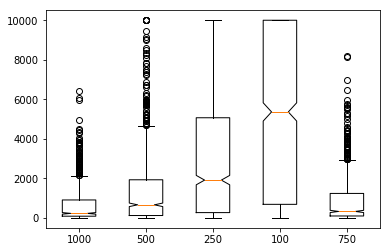

In [125]:
plt.boxplot(y, x, labels=x)
plt.show()

In [127]:
df_word_ev = pd.DataFrame(data_word_evol)
df_word_ev.to_csv("word_evo_data.csv")

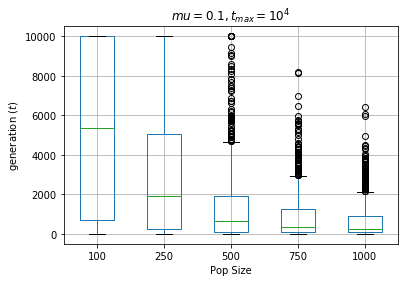

In [133]:
boxplot = df_word_ev.boxplot(column=[100, 250, 500, 750, 1000])
plt.xlabel('Pop Size')
plt.ylabel(r'generation ($t$)')
plt.title(r'$mu = 0.1, t_{max}=10^4$')
plt.savefig("box_plot.pdf")

plt.show()

In [134]:
success = []
for key in sorted(data_word_evol.keys()) : 
    p = np.array(data_word_evol[key])
    success.append([key,len(p[p<10000])])

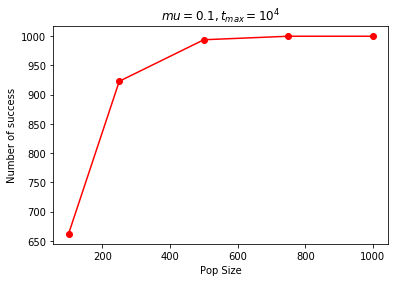

In [135]:
success = np.array(success)
plt.plot(success[:,0], success[:,1], 'r-o')
plt.xlabel('Pop Size')
plt.ylabel("Number of success")
plt.title(r'$mu = 0.1, t_{max}=10^4$')
plt.savefig("success.pdf")

plt.show()